#  PanSTARRS - WISE cross-match: Compute the $Q_0$

In [1]:
import numpy as np
from astropy.table import Table
from astropy import units as u
from astropy.coordinates import SkyCoord, search_around_sky

In [2]:
from mltier1 import generate_random_catalogue, Field, Q_0

In [3]:
%load_ext autoreload

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
field = Field(170.0, 190.0, 45.5, 56.5)

## Load the data

### Load the catalogues

In [6]:
panstarrs = Table.read("panstarrs_u1.fits")

In [7]:
wise = Table.read("wise_u1.fits")

### Coordinates

As we will use the coordinates to make a cross-match we to load them

In [8]:
coords_panstarrs = SkyCoord(panstarrs['raMean'], panstarrs['decMean'], unit=(u.deg, u.deg), frame='icrs')

In [9]:
coords_wise = SkyCoord(wise['raWise'], wise['decWise'], unit=(u.deg, u.deg), frame='icrs')

### Cross-match and random cross-match

We create an instance of Q_0 using as the input the two catalogues and the area. It will compute the $Q_0$ for different radius

In [10]:
# Example function (not used, we use a class that contains this code)
def q_0_r(coords_wise, coords_panstarrs, field, radius=5):
    """Compute the Q_0 for a given radius"""
    random_wise = field.random_catalogue(len(coords_wise))
    
    idx_random_wise, idx_panstarrs, d2d, d3d = search_around_sky(
        random_wise, coords_panstarrs, radius*u.arcsec)
    
    nomatch_random = len(coords_wise) - len(np.unique(idx_random_wise))
    
    idx_wise, idx_panstarrs, d2d, d3d = search_around_sky(
        coords_wise, coords_panstarrs, radius*u.arcsec)
    
    nomatch_wise = len(coords_wise) - len(np.unique(idx_wise))
                                          
    return (1. - float(nomatch_wise)/float(nomatch_random))

In [11]:
q_0_comp = Q_0(coords_wise, coords_panstarrs, field)

In [12]:
q_0_comp(radius=5)

0.6293697172922663

## $Q_0$ dependence on the radius

In [13]:
n_iter = 1

In [14]:
rads = list(range(1,26))

In [15]:
q_0_rad = []
for radius in rads:
    q_0_rad_aux = []
    for i in range(n_iter):
        out = q_0_comp(radius=radius)
        q_0_rad_aux.append(out)
    q_0_rad.append(np.mean(q_0_rad_aux))
    print("{:2d} {:7.5f} +/- {:7.5f} [{:7.5f} {:7.5f}]".format(radius, 
            np.mean(q_0_rad_aux), np.std(q_0_rad_aux), np.min(q_0_rad_aux), np.max(q_0_rad_aux)))

 1 0.51228 +/- 0.00000 [0.51228 0.51228]
 2 0.60789 +/- 0.00000 [0.60789 0.60789]
 3 0.63058 +/- 0.00000 [0.63058 0.63058]
 4 0.63361 +/- 0.00000 [0.63361 0.63361]
 5 0.62960 +/- 0.00000 [0.62960 0.62960]
 6 0.62111 +/- 0.00000 [0.62111 0.62111]
 7 0.61012 +/- 0.00000 [0.61012 0.61012]
 8 0.59731 +/- 0.00000 [0.59731 0.59731]
 9 0.58543 +/- 0.00000 [0.58543 0.58543]
10 0.57669 +/- 0.00000 [0.57669 0.57669]
11 0.57076 +/- 0.00000 [0.57076 0.57076]
12 0.56747 +/- 0.00000 [0.56747 0.56747]
13 0.56484 +/- 0.00000 [0.56484 0.56484]
14 0.56377 +/- 0.00000 [0.56377 0.56377]
15 0.56443 +/- 0.00000 [0.56443 0.56443]
16 0.56498 +/- 0.00000 [0.56498 0.56498]
17 0.56587 +/- 0.00000 [0.56587 0.56587]
18 0.56447 +/- 0.00000 [0.56447 0.56447]
19 0.56625 +/- 0.00000 [0.56625 0.56625]
20 0.56503 +/- 0.00000 [0.56503 0.56503]
21 0.56741 +/- 0.00000 [0.56741 0.56741]
22 0.56591 +/- 0.00000 [0.56591 0.56591]
23 0.56858 +/- 0.00000 [0.56858 0.56858]
24 0.56969 +/- 0.00000 [0.56969 0.56969]
25 0.56968 +/- 0

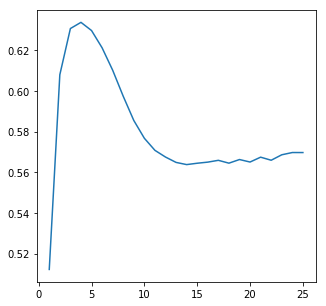

In [16]:
plt.rcParams["figure.figsize"] = (5,5)
plot(rads, q_0_rad)